In [181]:
import pyspark, pandas
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate() 
spark

In [182]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

plt.style.use('seaborn-colorblind')

%matplotlib inline

In [183]:
ca_df= spark.read.csv("./data/CAvideos.csv", header=True, inferSchema=True)
us_df= spark.read.csv("./data/USvideos.csv", header=True, inferSchema=True)

In [184]:
ca_df.toPandas().head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"""Eminem""|""Walk""|""On""|""Water""|""Aftermath/Shady/...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"""plush""|""bad unboxing""|""unboxing""|""fan mail""|""...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"""racist superman""|""rudy""|""mancuso""|""king""|""bac...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"""ryan""|""higa""|""higatv""|""nigahiga""|""i dare you""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"""edsheeran""|""ed sheeran""|""acoustic""|""live""|""co...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [186]:
print("Default schema as inferred by spark:")
ca_df.printSchema()

Default schema as inferred by spark:
root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [190]:
from pyspark.sql.types import StructType, StructField, TimestampType, StringType, BooleanType, DoubleType, IntegerType
schema1 = StructType([
    StructField("video_id", StringType(), True),
    StructField("trending_date", StringType(), True),
    StructField("title", StringType(), True),
    StructField("channel_title", StringType(), True),
    StructField("category_id", IntegerType(), True),
    StructField("publish_time", TimestampType(), True),
    StructField("tags", StringType(), True),
    StructField("views", IntegerType(), True),
    StructField("likes", IntegerType(), True),
    StructField("dislikes", IntegerType(), True),
    StructField("comment_count", IntegerType(), True),
    StructField("thumbnail_link", StringType(), True),
    StructField("comments_disabled", BooleanType(), True),
    StructField("ratings_disabled", BooleanType(), True),
    StructField("video_error_or_removed", BooleanType(), True),
    StructField("description", StringType(), True)])

In [191]:
ca_df= spark.read.csv("./data/CAvideos.csv",  schema=schema1, header=True, inferSchema=True)
us_df= spark.read.csv("./data/USvideos.csv",  schema=schema1,header=True, inferSchema=True)
fr_df= spark.read.csv("./data/FRvideos.csv", schema=schema1, header=True, inferSchema=True)
in_df= spark.read.csv("./data/INvideos.csv", schema=schema1, header=True, inferSchema=True)
gb_df= spark.read.csv("./data/GBvideos.csv", schema=schema1, header=True, inferSchema=True)

ca_cid = json.load(open('./data/CA_category_id.json'))
us_cid = json.load(open('./data/US_category_id.json'))
fr_cid = json.load(open('./data/FR_category_id.json'))
in_cid = json.load(open('./data/IN_category_id.json'))
gb_cid = json.load(open('./data/GB_category_id.json'))

In [192]:
ca_df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: integer (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: boolean (nullable = true)
 |-- video_error_or_removed: boolean (nullable = true)
 |-- description: string (nullable = true)



In [193]:
from pyspark.sql.functions import lit, create_map
from itertools import chain
ca_df = ca_df.withColumn("country",lit("Canada"))
us_df = us_df.withColumn("country",lit("USA"))
fr_df = fr_df.withColumn("country",lit("France"))
in_df = in_df.withColumn("country",lit("India"))
gb_df = gb_df.withColumn("country",lit("Britain"))

In [199]:
from functools import reduce
from pyspark.sql import DataFrame

df_all = reduce(DataFrame.unionAll, [ca_df,us_df,fr_df,in_df,gb_df])
df_all.count()

221658

In [200]:
#converting category id to category
id_to_category = {}
for category in ca_cid['items']:
    id_to_category[category['id']] = category['snippet']['title']
id_to_category

mapping_expr = create_map([lit(x) for x in chain(*id_to_category.items())])
df_all = df_all.withColumn("category",mapping_expr[df_all['category_id']])

In [ ]:
# dropping unnecessary columns
df_all= df_all.drop('category_id','thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed')

In [201]:
df_all.toPandas().head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.0,2017-11-10 17:00:03,"""Eminem""|""Walk""|""On""|""Water""|""Aftermath/Shady/...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Canada,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13 17:00:00,"""plush""|""bad unboxing""|""unboxing""|""fan mail""|""...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Canada,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12 19:05:24,"""racist superman""|""rudy""|""mancuso""|""king""|""bac...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12 18:01:41,"""ryan""|""higa""|""higatv""|""nigahiga""|""i dare you""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Canada,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09 11:04:14,"""edsheeran""|""ed sheeran""|""acoustic""|""live""|""co...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Canada,Music


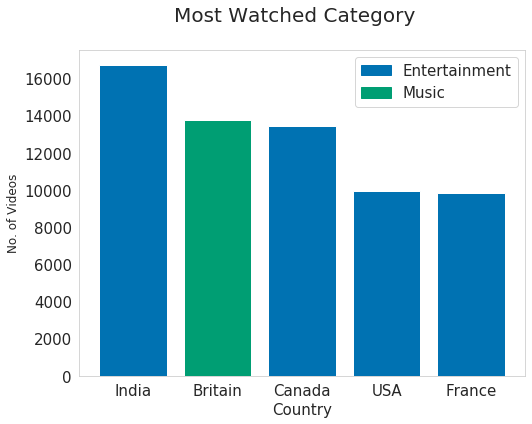

In [206]:
most_watched_category= df_all.select('country','category','title').groupby(['country','category']).count().orderBy('count',ascending=False).toPandas().head(5)

import matplotlib.patches as mpatches

plt.figure(figsize=(8,6))
plt.bar(most_watched_category['country'],most_watched_category['count'], color=['C0', 'C1', 'C0', 'C0', 'C0'])
c0 = mpatches.Patch(color='C0', label='Entertainment')
c1 = mpatches.Patch(color='C1', label='Music')
plt.grid(False)
plt.suptitle('Most Watched Category', fontsize=20)
plt.ylabel("No. of Videos",fontsize=12)
plt.xlabel("Country",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(handles=[c0, c1],fontsize=15)
plt.show();

# In countries like Canada, USA, France and India, category "Entertainment" has the maximum no of trending videos. But in Great Britain, "Music" is the most watched category.

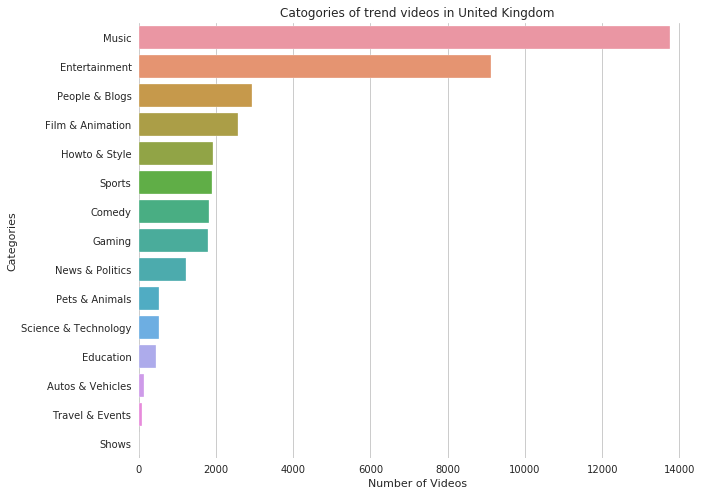

In [610]:
df2= df_all.toPandas()
cat_df_gb = df2[df2['country']=='Britain']['category'].value_counts().reset_index()
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_gb['index'],x=cat_df_gb['category'], data=cat_df_gb, orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trending videos in United Kingdom");

In [360]:
import pyspark.sql.functions
from pyspark.sql.functions import col,min, max

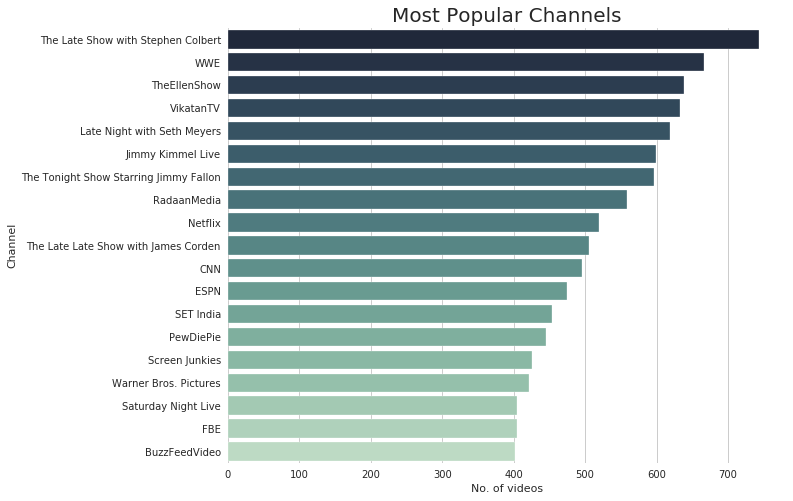

In [650]:
most_watched_channel= df_all.select('channel_title').groupby('channel_title').count().orderBy('count',ascending=False).toPandas().head(20)

most_watched_channel.dropna()
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Most Popular Channels",fontsize=20)
sns.barplot(x="count", y="channel_title", data=most_watched_channel, palette=sns.cubehelix_palette(n_colors=20,reverse=True,rot=-.4), ax=ax)
ax.set(xlabel="No. of videos", ylabel="Channel");

# Analysis on Coronavirus collected data from YouTube Data API

In [127]:
data1 = json.load(open('./data_coronavirus/corona_USMar7.json'))
df1= pd.DataFrame(data1['items'])
df1['trendDate']= pd.to_datetime("2020-03-07")

data2 = json.load(open('./data_coronavirus/corona_USMar9.json'))
df2= pd.DataFrame(data2['items'])
df2['trendDate']= pd.to_datetime("2020-03-09")

data3 = json.load(open('./data_coronavirus/corona_USMar11.json'))
df3= pd.DataFrame(data3['items'])
df3['trendDate']= pd.to_datetime("2020-03-11")

data4 = json.load(open('./data_coronavirus/corona_USMar13.json'))
df4= pd.DataFrame(data4['items'])
df4['trendDate']= pd.to_datetime("2020-03-13")

data5 = json.load(open('./data_coronavirus/corona_USMar15.json'))
df5= pd.DataFrame(data5['items'])
df5['trendDate']= pd.to_datetime("2020-03-15")

data6 = json.load(open('./data_coronavirus/corona_USMar17.json'))
df6= pd.DataFrame(data6['items'])
df6['trendDate']= pd.to_datetime("2020-03-17")

data7 = json.load(open('./data_coronavirus/corona_USMar20.json'))
df7= pd.DataFrame(data7['items'])
df7['trendDate']= pd.to_datetime("2020-03-20")

data8 = json.load(open('./data_coronavirus/corona_USMar23.json'))
df8= pd.DataFrame(data8['items'])
df8['trendDate']= pd.to_datetime("2020-03-23")

data9 = json.load(open('./data_coronavirus/corona_USMar25.json'))
df9= pd.DataFrame(data9['items'])
df9['trendDate']= pd.to_datetime("2020-03-25")

# data10 = json.load(open('./data_coronavirus/corona_USMar26.json'))
# df10= pd.DataFrame(data10['items'])
# df10['trendDate']= pd.to_datetime("2020-03-26")

df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9], axis=0)
df.head()

,kind,etag,id,snippet,statistics,trendDate,contentDetails
0,youtube#video,"""SJZWTG6xR0eGuCOh2bX6w3s4F94/5eIA1F_yjlkGOb494...",yXWw0_UfSFg,"{'publishedAt': '2020-03-07T21:00:00.000Z', 'c...","{'viewCount': '4197524', 'likeCount': '499455'...",2020-03-07,NaN
1,youtube#video,"""SJZWTG6xR0eGuCOh2bX6w3s4F94/_ZNQYOdjjjxkzLAfp...",NQDe5dNoNog,"{'publishedAt': '2020-03-07T19:03:35.000Z', 'c...","{'viewCount': '1335021', 'likeCount': '166664'...",2020-03-07,NaN
2,youtube#video,"""SJZWTG6xR0eGuCOh2bX6w3s4F94/bLUEZDX8dcV_jZa7Z...",6kYlkcNS4qw,"{'publishedAt': '2020-03-06T20:05:27.000Z', 'c...","{'viewCount': '4980315', 'likeCount': '392258'...",2020-03-07,NaN
3,youtube#video,"""SJZWTG6xR0eGuCOh2bX6w3s4F94/RsHnumxNQFvR-T45m...",jB4FUHHMI24,"{'publishedAt': '2020-03-07T08:35:00.000Z', 'c...","{'viewCount': '1008537', 'likeCount': '26676',...",2020-03-07,NaN
4,youtube#video,"""SJZWTG6xR0eGuCOh2bX6w3s4F94/anKRSUOctHmyk3jQ7...",k6bwOZW15gM,"{'publishedAt': '2020-03-06T15:00:06.000Z', 'c...","{'viewCount': '4245505', 'likeCount': '188810'...",2020-03-07,NaN


In [128]:
df['title']= df['snippet'].apply(lambda x : x.get('title'))
df['description']= df['snippet'].apply(lambda x : x.get('description'))
df['tags']= df['snippet'].apply(lambda x : x.get('tags') if 'tags' in x.keys() else [])
df['channel_title']= df['snippet'].apply(lambda x : x.get('channelTitle'))


df['viewCount']= df['statistics'].apply(lambda x : x.get('viewCount'))
df.viewCount = pd.to_numeric(df['viewCount'], errors="coerce")

df['likeCount']= df['statistics'].apply(lambda x : x.get('likeCount'))
df.likeCount = pd.to_numeric(df['likeCount'])

df['dislikeCount']= df['statistics'].apply(lambda x : x.get('dislikeCount'))
df.dislikeCount = pd.to_numeric(df['dislikeCount'])

df['commentCount']= df['statistics'].apply(lambda x : x.get('commentCount'))
df.commentCount = pd.to_numeric(df['commentCount'])


df['publishedDate']= df['snippet'].apply(lambda x : x.get('publishedAt'))
df['publishedDate']= pd.to_datetime(df['publishedDate']).dt.date

df.drop(['kind','etag','statistics', 'snippet','contentDetails'],axis=1, inplace=True)
df.rename(columns={"id": "videoId"},inplace=True)
print("No of latest trending videos:",df.shape[0])
df.head()

No of latest trending videos: 1800


,videoId,trendDate,title,description,tags,channel_title,viewCount,likeCount,dislikeCount,commentCount,publishedDate
0,yXWw0_UfSFg,2020-03-07,Anything You Can Fit In The Circle I’ll Pay For,Watch until the end to see how much i spent\nN...,[],MrBeast,4197524.0,499455.0,2835.0,24836.0,2020-03-07
1,NQDe5dNoNog,2020-03-07,Our tour went wrong in all the best ways,The best time with the best buds\nTickets to S...,"[jaiden, animations, jaidenanimation, jaidenan...",Jaiden Animations,1335021.0,166664.0,917.0,16758.0,2020-03-07
2,6kYlkcNS4qw,2020-03-07,Addressing My Weight Gain...,NEW Merch :) https://www.shanedawsonmerch.com\...,"[shane dawson, jeffree star, journalism, inves...",ShaneGlossin,4980315.0,392258.0,9385.0,32301.0,2020-03-06
3,jB4FUHHMI24,2020-03-07,Neil deGrasse Tyson On Coronavirus: Will Peopl...,"America's favorite astrophysicist, who hosts ""...","[The Late Show, Late Show, Stephen Colbert, St...",The Late Show with Stephen Colbert,1008537.0,26676.0,988.0,3606.0,2020-03-07
4,k6bwOZW15gM,2020-03-07,Baby Pluto,Provided to YouTube by Generation Now/Atlantic...,"[Lil Uzi Vert, Eternal Atake, Baby Pluto]",Lil Uzi Vert - Topic,4245505.0,188810.0,6887.0,17621.0,2020-03-06


In [129]:
c1= df[df['description'].str.contains('corona|covid|virus|pandemic|emergency',case=False) | df['tags'].str.contains('corona|covid|virus|pandemic',case=False)].groupby(['trendDate']).count()
print("Total trending videos related to COVID-19:" ,c1['videoId'].sum())

Total trending videos related to COVID-19: 301


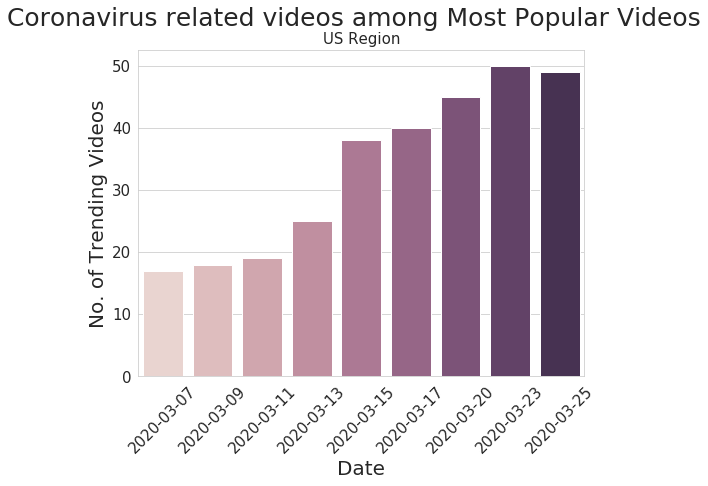

In [130]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")

sns.barplot(x=c1.index.to_period('D') ,y=c1['videoId'], palette=sns.cubehelix_palette(n_colors=10))
plt.ylabel('No. of Trending Videos',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)

plt.suptitle('Coronavirus related videos among Most Popular Videos',fontsize=25)
plt.title('US Region',fontsize=15)
plt.show();

In [131]:
df_covid = df[df['description'].str.contains('corona|covid|virus|pandemic',case=False) | df['tags'].str.contains('corona|covid|virus|pandemic',case=False)]
df_covid = df_covid.drop_duplicates(subset='videoId', keep="first")
c2= df_covid.groupby('channel_title')['viewCount'].count().sort_values(ascending=False).head(20)
c2

channel_title
DW News                                             8
CNN                                                 7
BBC News                                            7
Good Mythical Morning                               6
NBC News                                            6
Channel 4 News                                      6
Doctor Mike                                         5
Good Mythical MORE                                  5
ABC News                                            5
MSNBC                                               5
Fox News                                            4
Jimmy Kimmel Live                                   4
Vox                                                 3
TODAY                                               3
The Tonight Show Starring Jimmy Fallon              3
Global News                                         3
Centers for Disease Control and Prevention (CDC)    3
Washington Post                                     3
CBS This Morni

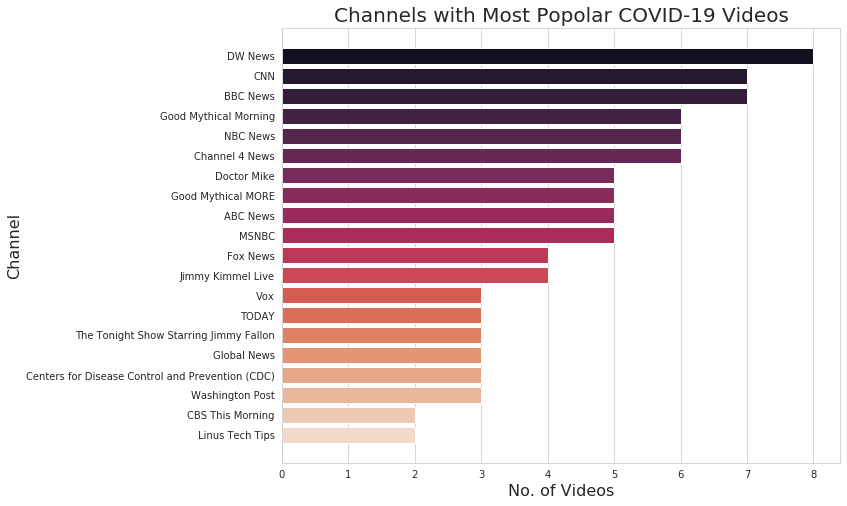

In [132]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Channels with Most Popolar COVID-19 Videos",fontsize=20)
sns.barplot(x=c2, y=c2.index, palette="rocket",ax=ax)
plt.xlabel("No. of Videos",fontsize=16)
plt.ylabel("Channel",fontsize=16)
plt.plot();

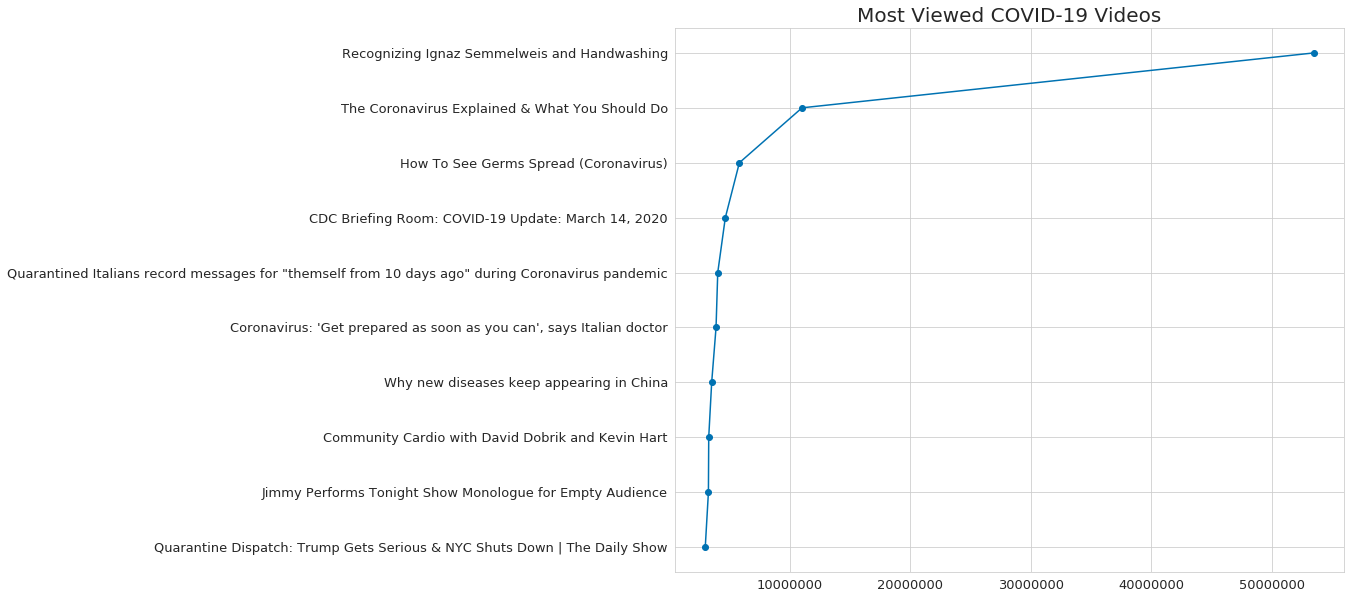

In [177]:
visual= df_covid.sort_values('viewCount',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12,10))
plt.plot(visual['viewCount'], visual['title'],marker="o")
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.title('Most Viewed COVID-19 Videos', fontsize=20)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.gca().invert_yaxis()
plt.show();